In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [3]:
database_file = 'C:\Data Science\data\chicago-crime-property-analysis\chicago-crime-property-analysis\Israel\data\chicago-crime-property.db'
connection = sqlite3.connect(database_file)
cursor = connection.cursor()

table_query = "SELECT * FROM property_with_crime"

In [4]:
df = pd.read_sql_query(table_query, connection)

connection.close()

In [4]:
df.head()

,style,beds,sqft,year_built,days_on_mls,sold_price,last_sold_date,latitude,longitude,community,neighborhood,crime_count
0,SINGLE_FAMILY,3,1350,1890,292,10155.0,2014-02-11 00:00:00,41.737989,-87.659826,AUBURN GRESHAM,AUBURN GRESHAM,6918
1,SINGLE_FAMILY,3,1300,1916,-1,57000.0,2014-02-10 00:00:00,41.753629,-87.651748,AUBURN GRESHAM,AUBURN GRESHAM,6918
2,SINGLE_FAMILY,3,692,1951,202,37000.0,2014-02-10 00:00:00,41.750975,-87.670384,AUBURN GRESHAM,AUBURN GRESHAM,6918
3,MULTI_FAMILY,7,-1,-1,2,175000.0,2014-02-06 00:00:00,41.752159,-87.647356,AUBURN GRESHAM,AUBURN GRESHAM,6918
4,SINGLE_FAMILY,2,1437,1922,122,21000.0,2014-02-06 00:00:00,41.756438,-87.651120,AUBURN GRESHAM,AUBURN GRESHAM,6918


In [6]:
df.describe()

,beds,sqft,year_built,days_on_mls,sold_price,latitude,longitude,crime_count
count,313419.000000,3.134190e+05,313419.000000,313419.000000,3.134190e+05,313419.000000,313419.000000,313419.000000
mean,2.156532,1.125788e+03,1304.297113,33.810659,7.236835e+05,41.881463,-87.674483,5147.207342
std,3.416618,6.579447e+03,916.872425,67.991046,5.971562e+06,0.084896,0.057103,3302.427075
min,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,41.644737,-87.935380,262.000000
25%,-1.000000,-1.000000e+00,-1.000000,-1.000000,1.890000e+05,41.824196,-87.706507,2368.000000
50%,2.000000,9.150000e+02,1915.000000,-1.000000,3.075000e+05,41.898391,-87.663889,4347.000000
75%,4.000000,1.600000e+03,1958.000000,53.000000,4.900000e+05,41.944243,-87.635302,7940.000000
max,999.000000,1.923400e+06,2023.000000,2144.000000,3.673000e+08,42.022841,-87.524883,12420.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313419 entries, 0 to 313418
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   style           312967 non-null  object 
 1   beds            313419 non-null  int64  
 2   sqft            313419 non-null  int64  
 3   year_built      313419 non-null  int64  
 4   days_on_mls     313419 non-null  int64  
 5   sold_price      313419 non-null  float64
 6   last_sold_date  313419 non-null  object 
 7   latitude        313419 non-null  float64
 8   longitude       313419 non-null  float64
 9   community       313419 non-null  object 
 10  neighborhood    313419 non-null  object 
 11  crime_count     313419 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 28.7+ MB


In [9]:
df['neighborhood'].value_counts()

neighborhood
NEAR NORTH SIDE    28688
LAKE VIEW          19686
WEST TOWN          16142
NEAR WEST SIDE     14401
LINCOLN PARK       14043
                   ...  
PULLMAN              556
OAKLAND              448
BURNSIDE             263
FULLER PARK          240
RIVERDALE             84
Name: count, Length: 77, dtype: int64

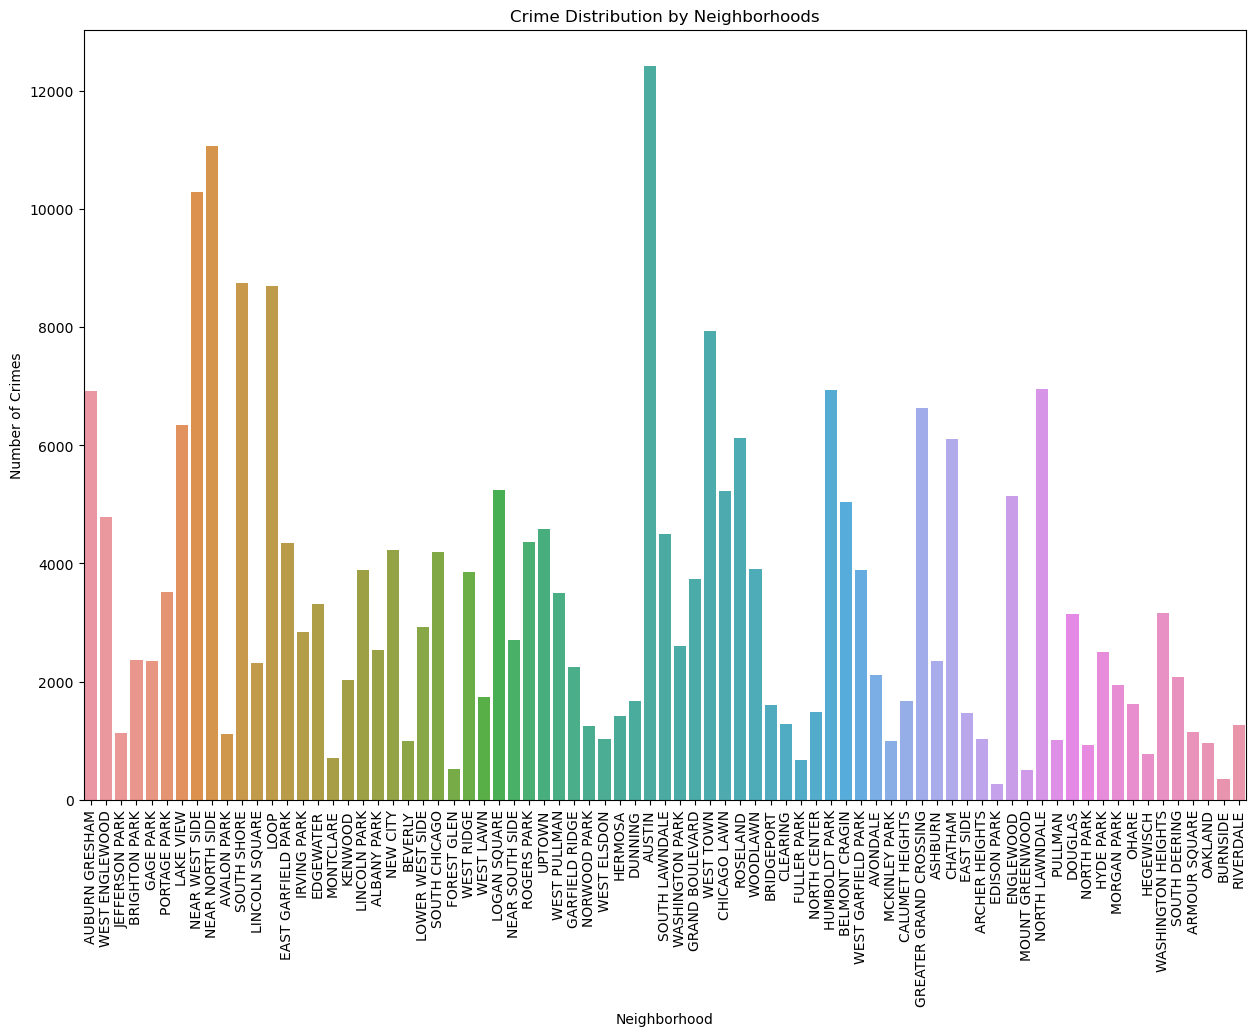

In [12]:
# Assuming 'neighborhood' is the column with neighborhood names and 'crimes' is the column with crime counts
plt.figure(figsize=(15, 10))
sns.barplot(x='neighborhood', y='crime_count', data=df)
plt.xticks(rotation=90)
plt.title('Crime Distribution by Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.show()

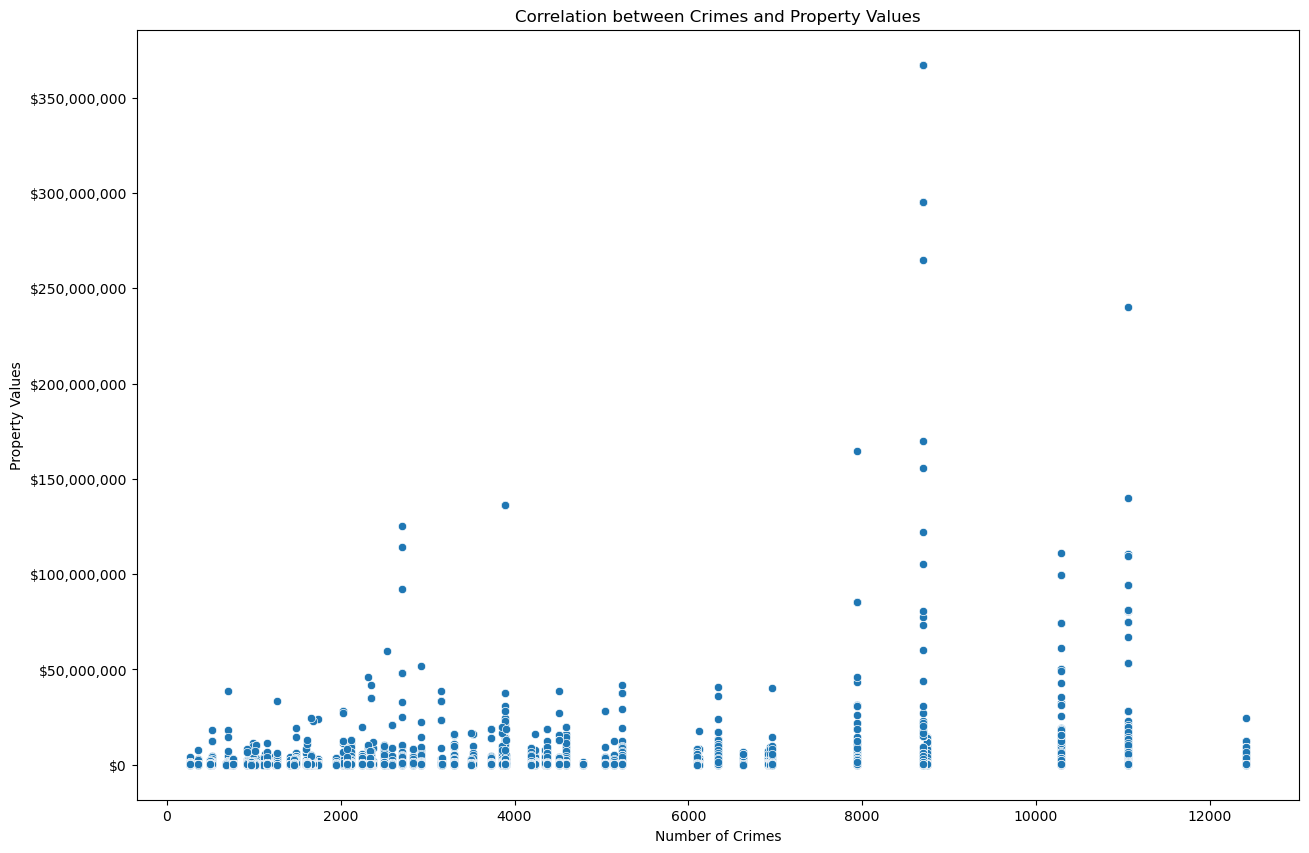

In [24]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='crime_count', y='sold_price', data=df)


# Define a custom currency formatter function
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Apply the currency formatter to the Y-axis
formatter = FuncFormatter(currency_formatter)

plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Correlation between Crimes and Property Values')
plt.xlabel('Number of Crimes')
plt.ylabel('Property Values')
plt.show()

In [12]:
df['last_sold_date'] = pd.to_datetime(df['last_sold_date'])
df_grouped = df.groupby(pd.Grouper(key='last_sold_date', freq='Q')).size().reset_index(name='count')
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   last_sold_date  40 non-null     datetime64[ns]
 1   count           40 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 772.0 bytes


In [13]:
merged_df = pd.merge(df, df_grouped, on='last_sold_date', how='right')

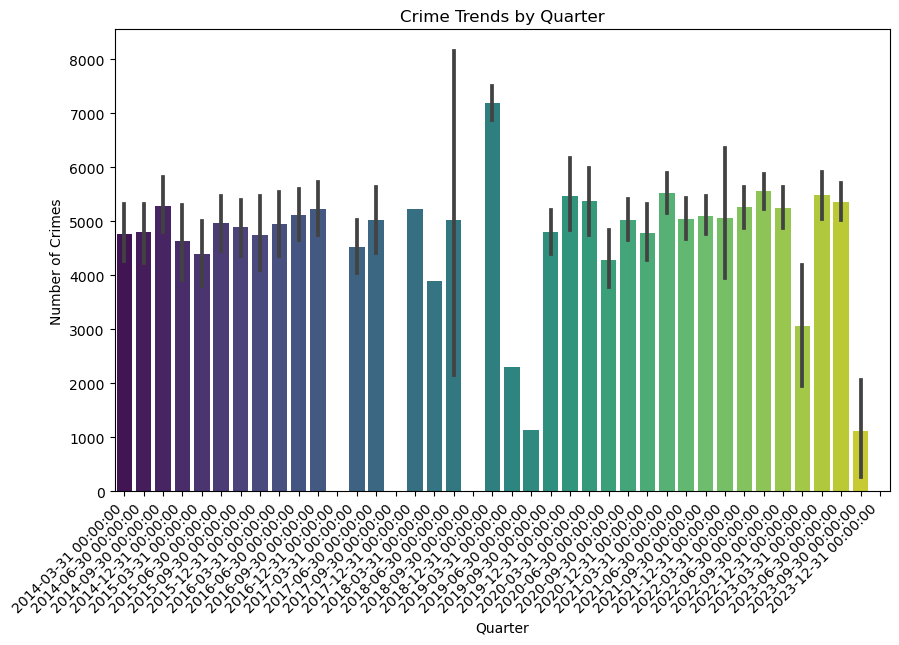

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='last_sold_date', y='crime_count', data=merged_df, palette='viridis')
plt.title('Crime Trends by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

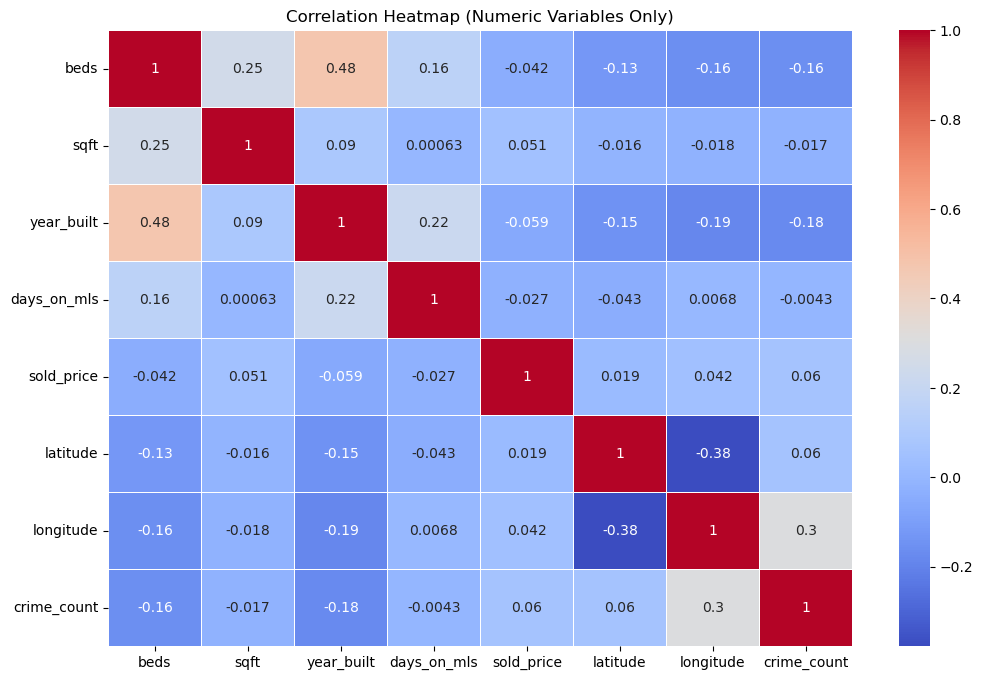

In [18]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (Numeric Variables Only)')
plt.show()